In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Advertising.csv",index_col=0)

In [ ]:
data=df[["TV","sales"]]
X=data["TV"]
y=data["sales"]

In [ ]:
#(200,1) şeklinde reshape edilmeli
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [ ]:
#Statsmodels OLS
import statsmodels.api as sm

In [ ]:
#beta0 için 1 katsayısını eklememiz lazım
X_train_ols=sm.add_constant(X_train)

In [ ]:
#statsmodels OLS modeli oluştur
sm_model=sm.OLS(y_train,X_train_ols)

In [ ]:
#Model sonuç al
sonuc=sm_model.fit()

In [ ]:
#özet tablosu yazdır
print(sonuc.summary())

In [ ]:
#R^2 ve Adjusted R^2 önemli. Doğruluk katsayısı.
#Coefficientlar önemli. Betaların X katsayılarını, yani y'ye olan etkisini söyler
#std err, ortalamada ne kadar hata yapıldığını gösterir.
#t önemli, t bizi P'ye götürür. Biz p'yi kullanıcaz.

In [3]:
df=pd.read_csv("Advertising.csv",index_col=0)

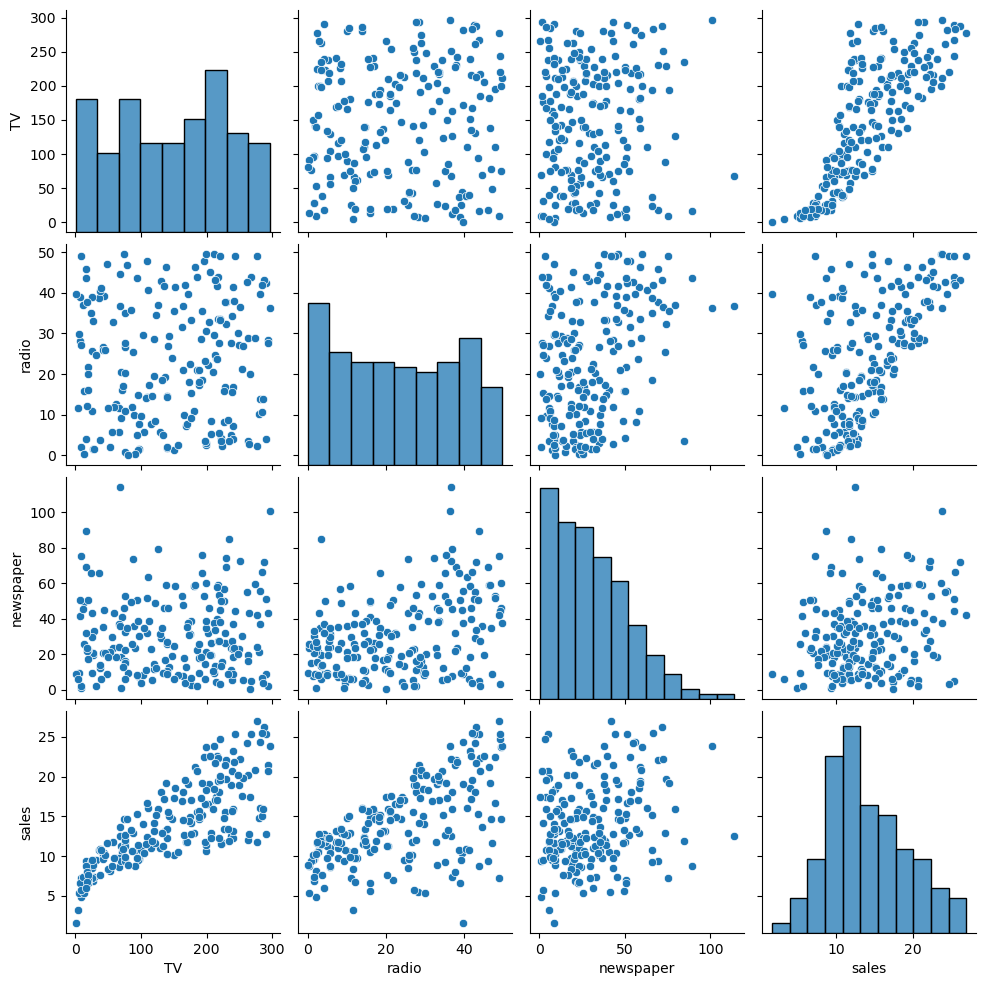

In [4]:
sns.pairplot(df)

In [5]:
X=df[["TV","radio","newspaper"]]

In [6]:
y=df["sales"]

In [7]:
sns.pairplot(df, x_vars=df.columns[:3],y_vars=df.columns[3],height=5)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()

In [13]:
y=y.values.reshape(-1,1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.intercept_
#Beta0

array([2.65278967])

In [22]:
lr.coef_

array([[0.0454256 , 0.18975773, 0.00460308]])

In [23]:
katsayilar=pd.DataFrame(lr.coef_,columns=["beta1(TV)","beta2(Radio)","beta3(Newspaper)"])

In [24]:
katsayilar

,beta1(TV),beta2(Radio),beta3(Newspaper)
0,0.045426,0.189758,0.004603


In [25]:
y_pred=lr.predict(X_test)

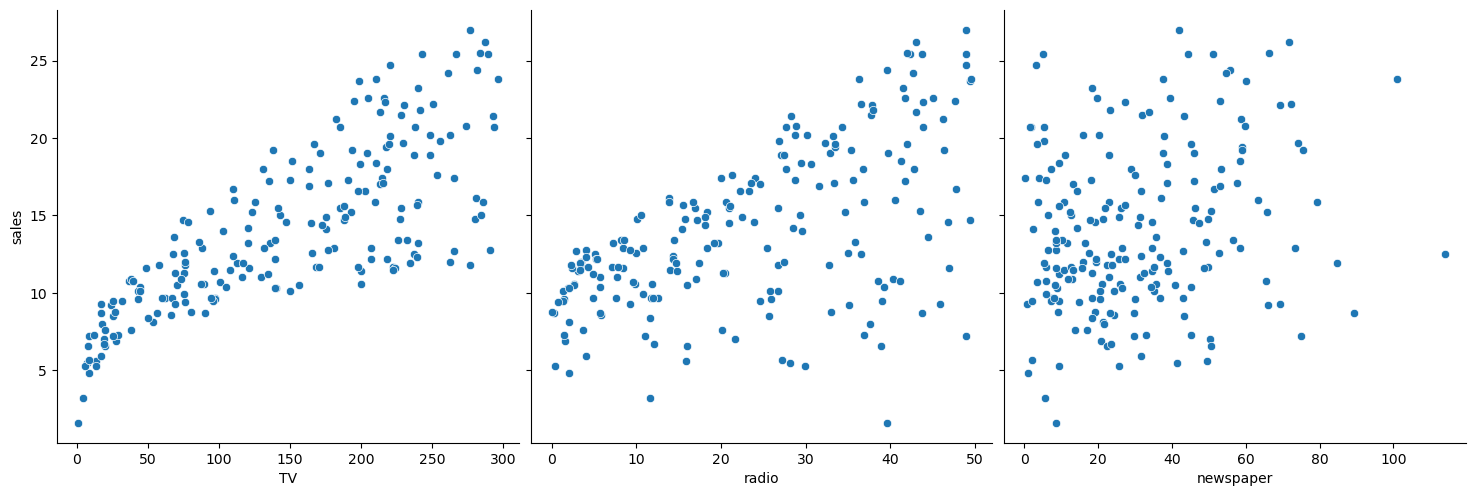

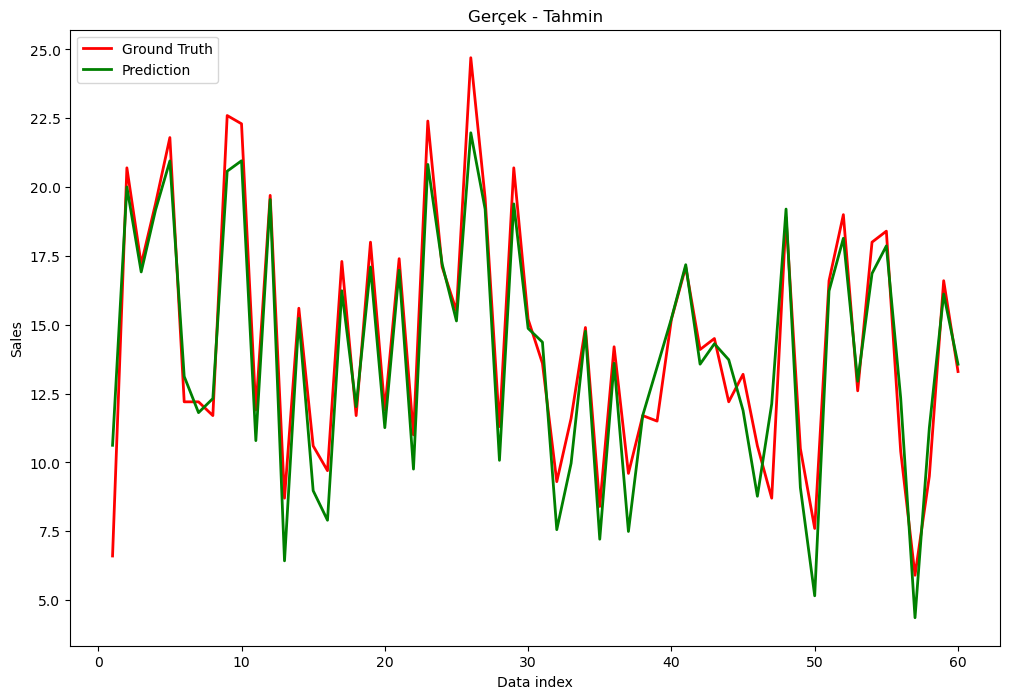

In [26]:
#Gerçek ve tahmini çiz
indexler=range(1,61)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test,label="Ground Truth",color="red",linewidth=2)

ax.plot(indexler,y_pred,label="Prediction",color="green",lw=2)

plt.title("Gerçek - Tahmin")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

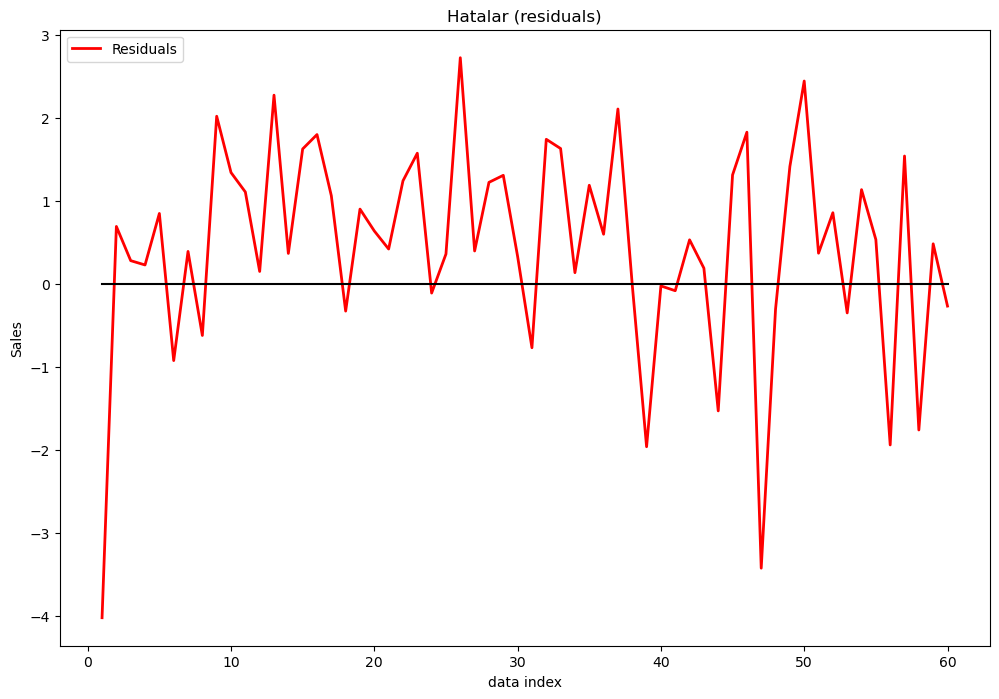

In [27]:
#hataları çiz
import numpy as np
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test-y_pred,label="Residuals",color="r",lw=2)

ax.plot(indexler,np.zeros(60),c="black")

plt.title("Hatalar (residuals)")
plt.xlabel("data index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

In [28]:
#model doğruluğu kontrol etme

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
r_2=r2_score(y_test,y_pred)

In [32]:
r_2

0.9058622107532247

In [33]:
r_2*100

90.58622107532247

In [35]:
mse=mean_squared_error(y_test,y_pred)
mse

1.8506819941636943

In [37]:
import math
rmse=math.sqrt(mse)
rmse

1.3603977338130544

In [38]:
#OLS

In [39]:
import statsmodels.api as sm
X_train_ols=sm.add_constant(X_train)

In [40]:
sm_model=sm.OLS(y_train,X_train_ols)

In [42]:
sonuc=sm_model.fit()

In [44]:
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           9.97e-66
Time:                        12:42:20   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [45]:
#newspaper'ın p skorundan dolayı önemli olmadığını gördük ve modeli tekrar çalıştırınca newspaperı çıkarıp tekrar deneriz

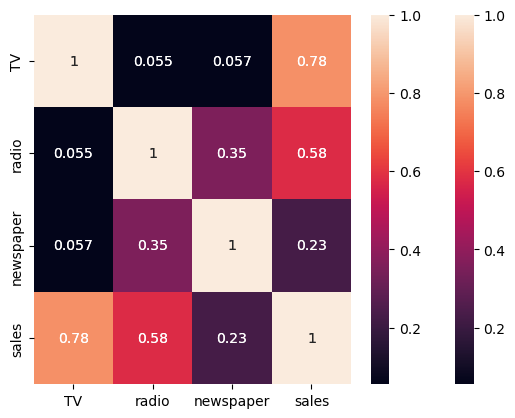

In [47]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [48]:
X_train_yeni = X_train[["TV","radio"]]

In [49]:
X_test_yeni=X_test[["TV","radio"]]

In [50]:
lr.fit(X_train_yeni,y_train)

LinearRegression()

In [51]:
y_pred_yeni=lr.predict(X_test_yeni)

In [52]:
X_train_yeni_ols=sm.add_constant(X_train_yeni)

In [53]:
sm_model=sm.OLS(y_train,X_train_yeni_ols)

In [54]:
sonuc=sm_model.fit()

In [55]:
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.46e-67
Time:                        12:56:27   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

In [56]:
#Bu işlem backward elimination'dı

In [57]:
#Datam sadece newspaper olsaydı, satışı ne kadar iyi temsil ederdi?

In [59]:
X=df["newspaper"]
y=df["sales"]
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)
X_train_ols=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_ols)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.65
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           0.000195
Time:                        13:02:05   Log-Likelihood:                -430.09
No. Observations:                 140   AIC:                             864.2
Df Residuals:                     138   BIC:                             870.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4844      0.763     15.052      0.0

In [60]:
#Adjusted R^2 forward selection'da işe yarar. Sıfırdan başlayınca ilk bir kaç değişkende hep R^2 artacağı için, her değişken önemliymiş gibi görünmemesini sağlar.

In [61]:
#Label Encoding

In [63]:
evlilik_durumu=("Evli","Bekar","Belirtilmemis")
evlilik_df=pd.DataFrame(evlilik_durumu,columns=["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [64]:
evlilik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Evlilik_Durumu  3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [65]:
evlilik_df["Evlilik_Durumu"]=evlilik_df["Evlilik_Durumu"].astype("category")

In [66]:
evlilik_df["Evlilik_Kategorileri"] = evlilik_df["Evlilik_Durumu"].cat.codes
evlilik_df

,Evlilik_Durumu,Evlilik_Kategorileri
0,Evli,2
1,Bekar,0
2,Belirtilmemis,1


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
evlilik_durumu=("Evli","Bekar","Belirtilmemis")
evlilik_df=pd.DataFrame(evlilik_durumu,columns=["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [70]:
label_encoder=LabelEncoder()

In [72]:
evlilik_df["Evlilik_Kategorileri_Sklearn"]=label_encoder.fit_transform(evlilik_df["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu,Evlilik_Kategorileri_Sklearn
0,Evli,2
1,Bekar,0
2,Belirtilmemis,1


In [73]:
#One hot encoder. Önem sırasını elimine etmek için kullanılır.

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
evlilik_durumu=("Evli","Bekar","Belirtilmemis")
evlilik_df=pd.DataFrame(evlilik_durumu,columns=["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [77]:
#boş datayı ignore et
enc=OneHotEncoder(handle_unknown="ignore")

In [78]:
enc_result=enc.fit_transform(evlilik_df[["Evlilik_Durumu"]])

In [79]:
enc_df=pd.DataFrame(enc_result.toarray())
enc_df

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0


In [80]:
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [81]:
evlilik_df=evlilik_df.join(enc_df)
evlilik_df

,Evlilik_Durumu,0,1,2
0,Evli,0.0,0.0,1.0
1,Bekar,1.0,0.0,0.0
2,Belirtilmemis,0.0,1.0,0.0


In [82]:
evlilik_durumu=("Evli","Bekar","Belirtilmemis")
evlilik_df=pd.DataFrame(evlilik_durumu,columns=["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [83]:
dummy_df=pd.get_dummies(evlilik_df,columns=["Evlilik_Durumu"])
dummy_df

,Evlilik_Durumu_Bekar,Evlilik_Durumu_Belirtilmemis,Evlilik_Durumu_Evli
0,0,0,1
1,1,0,0
2,0,1,0


In [84]:
evlilik_df=evlilik_df.join(dummy_df)
evlilik_df

,Evlilik_Durumu,Evlilik_Durumu_Bekar,Evlilik_Durumu_Belirtilmemis,Evlilik_Durumu_Evli
0,Evli,0,0,1
1,Bekar,1,0,0
2,Belirtilmemis,0,1,0
